In [1]:
"""
Data Cleaning Script for Job Market Analysis Dashboard
Author: Adarsh Pujari
Description: Cleans Stack Overflow survey data, prepares CSVs for Power BI.
"""

'\nData Cleaning Script for Job Market Analysis Dashboard\nAuthor: Adarsh Pujari\nDescription: Cleans Stack Overflow survey data, prepares CSVs for Power BI.\n'

In [2]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../datasets/survey_results_public.csv')

# Display shape and first 5 rows
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.head()


Rows: 65437, Columns: 114


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [4]:
# Choose relevant columns for analysis
selected_columns = [
    'Country', 'EdLevel', 'DevType', 'LanguageHaveWorkedWith',
    'RemoteWork', 'ConvertedCompYearly'
]

df = df[selected_columns]
df.head()


,Country,EdLevel,DevType,LanguageHaveWorkedWith,RemoteWork,ConvertedCompYearly
0,United States of America,Primary/elementary school,NaN,NaN,Remote,NaN
1,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Remote,NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Developer Experience,C#,Remote,NaN
3,Canada,Some college/university study without earning ...,"Developer, full-stack",C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,NaN,NaN
4,Norway,"Secondary school (e.g. American high school, G...","Developer, full-stack",C++;HTML/CSS;JavaScript;Lua;Python;Rust,NaN,NaN


In [5]:
# Drop rows with no salary
df = df.dropna(subset=['ConvertedCompYearly'])

# Drop rows with no job role
df = df.dropna(subset=['DevType'])

# Fill other missing values with "Unknown"
df = df.fillna('Unknown')

# Convert salary to float (just in case)
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].astype(float)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 23403 entries, 72 to 41187
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 23403 non-null  object 
 1   EdLevel                 23403 non-null  object 
 2   DevType                 23403 non-null  object 
 3   LanguageHaveWorkedWith  23403 non-null  object 
 4   RemoteWork              23403 non-null  object 
 5   ConvertedCompYearly     23403 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.2+ MB


C:\Users\ASUS RGB\AppData\Local\Temp\ipykernel_26728\937584710.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[r[1] for r in top_roles], y=[r[0] for r in top_roles], palette="Blues_d")


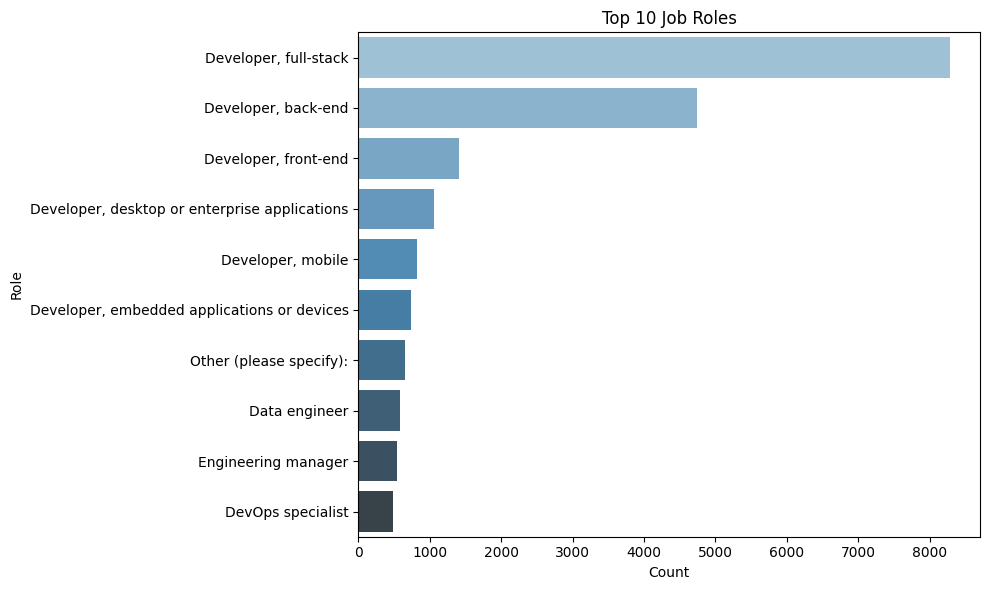

In [6]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Split multiple roles in 'DevType' column
roles = df['DevType'].str.split(';')
role_counts = Counter([r.strip() for sublist in roles for r in sublist])

# Top 10 roles
top_roles = role_counts.most_common(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=[r[1] for r in top_roles], y=[r[0] for r in top_roles], palette="Blues_d")
plt.title("Top 10 Job Roles")
plt.xlabel("Count")
plt.ylabel("Role")
plt.tight_layout()
plt.show()


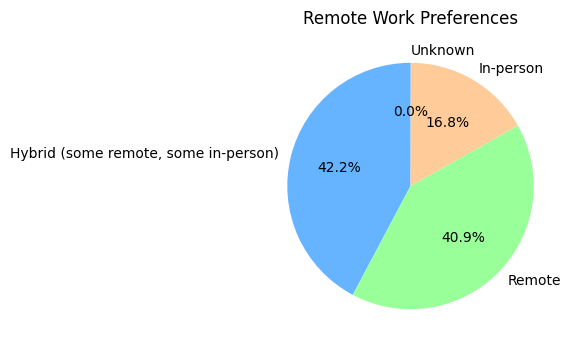

In [7]:
remote_counts = df['RemoteWork'].value_counts()

plt.figure(figsize=(6,4))
remote_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title("Remote Work Preferences")
plt.ylabel('')
plt.show()


In [8]:
df['Country'] = df['Country'].replace({
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'United States of America': 'USA'
})
education_map = {
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor's",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master's",
    "Doctoral degree (Ph.D., Ed.D., etc.)": "PhD",
    "Professional degree (JD, MD, etc.)": "Professional",
    "Some college/university study without earning a degree": "Some College",
    "Associate degree (A.A., A.S., etc.)": "Associate",
    "I never completed any formal education": "No Formal Education",
    "Primary/elementary school": "Primary School",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary School"
}

df['EdLevel'] = df['EdLevel'].replace(education_map)




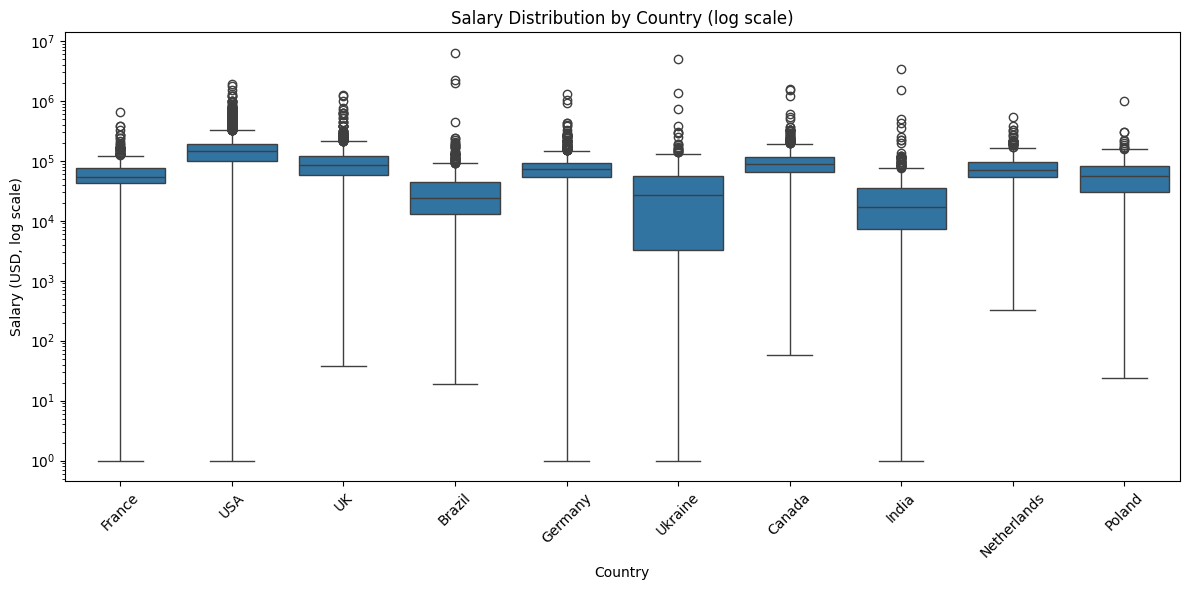

In [9]:
top_countries = df['Country'].value_counts().head(10).index
filtered_df = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=filtered_df)
plt.xticks(rotation=45)
plt.yscale("log")  # Salary range is large
plt.title("Salary Distribution by Country (log scale)")
plt.ylabel("Salary (USD, log scale)")
plt.tight_layout()
plt.show()


C:\Users\ASUS RGB\AppData\Local\Temp\ipykernel_26728\534879897.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[l[1] for l in top_langs], y=[l[0] for l in top_langs], palette='magma')


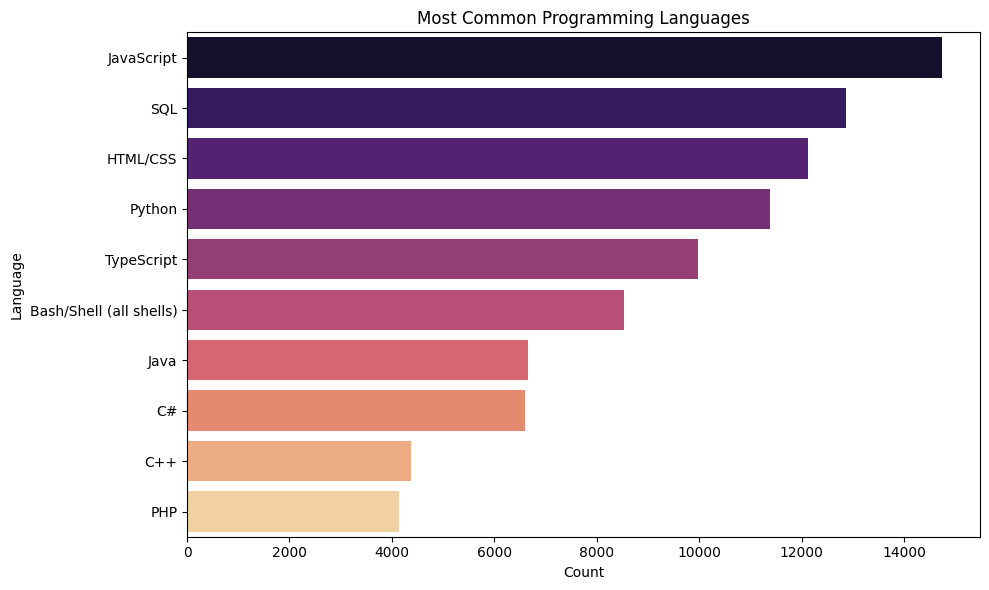

In [10]:
# Count languages
langs = df['LanguageHaveWorkedWith'].str.split(';')
lang_counts = Counter([lang.strip() for sublist in langs for lang in sublist])

# Top 10
top_langs = lang_counts.most_common(10)

plt.figure(figsize=(10,6))
sns.barplot(x=[l[1] for l in top_langs], y=[l[0] for l in top_langs], palette='magma')
plt.title("Most Common Programming Languages")
plt.xlabel("Count")
plt.ylabel("Language")
plt.tight_layout()
plt.show()


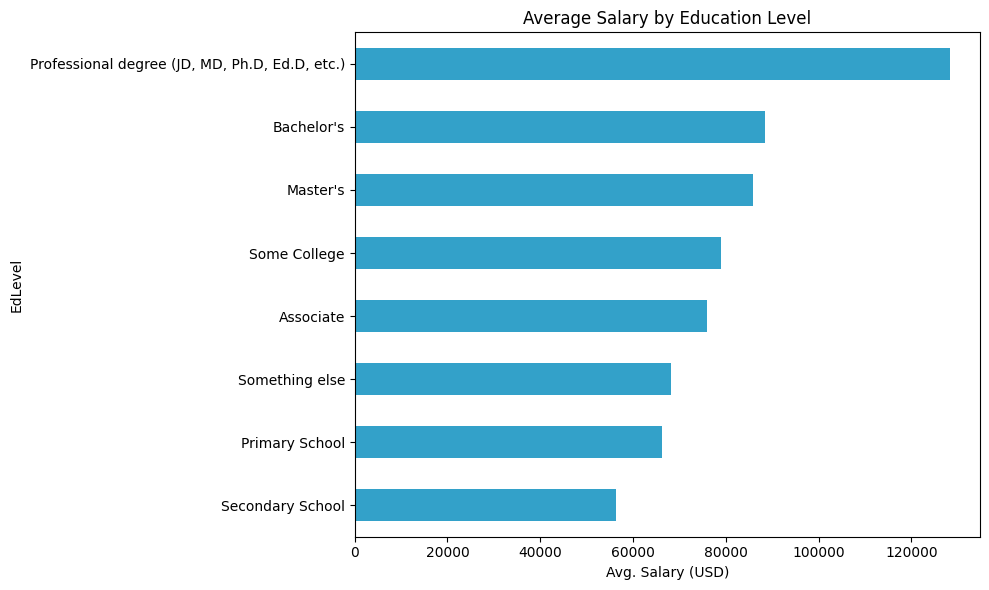

In [11]:
edu_salary = df.groupby('EdLevel')['ConvertedCompYearly'].mean().sort_values(ascending=False).head(8)

plt.figure(figsize=(10,6))
edu_salary.plot(kind='barh', color='#33A1C9')
plt.title("Average Salary by Education Level")
plt.xlabel("Avg. Salary (USD)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [12]:
df.to_csv('cleaned_survey_data.csv', index=False)

In [13]:
# Load both files
df_cleaned = pd.read_csv("cleaned_survey_data.csv")
df_original = pd.read_csv("../datasets/survey_results_public.csv")

# Add YearsCodePro column
df_cleaned['YearsCodePro'] = df_original['YearsCodePro']

# Save the updated file
df_cleaned.to_csv("cleaned_survey_data.csv", index=False)


In [14]:
from collections import Counter
import pandas as pd

df = pd.read_csv("cleaned_survey_data.csv")

# Use correct column name — update this if your column is shortened in CSV
column_name = [col for col in df.columns if 'language' in col.lower()][0]

# Drop missing and split entries
lang_series = df[column_name].dropna()

# Use ; instead of , as your screenshot shows that separator
all_languages = []
for entry in lang_series:
    all_languages.extend([lang.strip() for lang in entry.split(";")])

# Count and save
lang_counter = Counter(all_languages)
lang_df = pd.DataFrame(lang_counter.items(), columns=["Language", "Count"])
lang_df = lang_df.sort_values(by="Count", ascending=False)

# Save top 10 languages
lang_df.head(10).to_csv("top_languages.csv", index=False)
